In [1]:
!pip install import_ipynb==0.1.3

In [2]:
import numpy as np
import matplotlib as mp

import matplotlib.pyplot as plt
import pandas as pd
import import_ipynb

from sklearn import linear_model
from sklearn import cluster
from DataPreparation import *


df_train = prelucrareDate("Date antrenare.csv")
#pd.read_csv("Date antrenare.csv")

df_train

importing Jupyter notebook from DataPreparation.ipynb


,instituția sursă,sex,vârstă,dată debut simptome declarate,simptome declarate,dată internare,simptome raportate la internare,diagnostic și semne de internare,istoric de călătorie,mijloace de transport folosite,confirmare contact cu o persoană infectată,data rezultat testare,rezultat testare,dată debut simptome
0,Z,MASCULIN,45,NaN,NaN,NaN,NaN,NaN,NU,NU,NU,04-04-2020 0:00:00,NEGATIV,04-04-2020 0:00:00
1,X,FEMININ,81,2020-04-08 00:00:00,DURERI ABDOMINALE,2020-04-08 00:00:00,DUREI ABD,HEMORAGIE DIGESTIVA,NU,NU,NU,13-04-2020 0:00:00,NEGATIV,13-04-2020 0:00:00
2,y,FEMININ,79,NaN,NaN,NaN,NaN,NaN,NU,NU,NU,30-04-2020 0:00:00,NEGATIV,30-04-2020 0:00:00
3,X,FEMININ,71,2020-04-11 00:00:00,"tuse seaca ,febra",2020-04-14 00:00:00,"tuse seaca ,febra",susp.Covid 19,NU,NU,NU,14-04-2020 0:00:00,NEGATIV,14-04-2020 0:00:00
4,X,MASCULIN,52,2020-04-14 00:00:00,nu are,2020-04-14 00:00:00,nu are,Retard mental cu tulburari de comportament severe,NU,NU,DA,14-04-2020 0:00:00,NEGATIV,14-04-2020 0:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,y,FEMININ,47,NaN,NaN,NaN,NaN,NaN,NU,NU,NU,15-05-2020 0:00:00,NEGATIV,15-05-2020 0:00:00
3861,y,MASCULIN,73,NaN,NaN,NaN,NaN,NaN,NU,NU,NU,19-05-2020 0:00:00,NEGATIV,19-05-2020 0:00:00
3862,X,FEMININ,80,2020-04-03 00:00:00,"febra, dificultati respiratorii",2020-04-03 00:00:00,dispnee febra tuse seaca,pneumopatie acuta,NU,NU,NU,3-4-2020 0:00:00,NEGATIV,3-4-2020 0:00:00
3863,y,FEMININ,47,2020-04-07 00:00:00,NaN,NaN,NaN,NaN,NU,NU,NU,07-04-2020 0:00:00,NEGATIV,07-04-2020 0:00:00


In [3]:
df_train.dtypes

instituția sursă                              object
sex                                           object
vârstă                                        object
dată debut simptome declarate                 object
simptome declarate                            object
dată internare                                object
simptome raportate la internare               object
diagnostic și semne de internare              object
istoric de călătorie                          object
mijloace de transport folosite                object
confirmare contact cu o persoană infectată    object
data rezultat testare                         object
rezultat testare                              object
dată debut simptome                           object
dtype: object

In [4]:
df_test = prelucrareDate("Date test.csv")
#pd.read_csv("Date test.csv")

df_test

,instituția sursă,sex,vârstă,dată debut simptome declarate,simptome declarate,dată internare,simptome raportate la internare,diagnostic și semne de internare,istoric de călătorie,mijloace de transport folosite,confirmare contact cu o persoană infectată,data rezultat testare,rezultat testare,dată debut simptome
0,X,FEMININ,52,NaN,NaN,NaN,NaN,NaN,NU,NU,NU,04-04-2020 0:00:00,NEGATIV,04-04-2020 0:00:00
1,X,FEMININ,40,NaN,NaN,NaN,NaN,NaN,NU,NU,NU,13-04-2020 0:00:00,NEGATIV,13-04-2020 0:00:00
2,X,MASCULIN,69,2020-04-14 00:00:00,ASIMPTOMATIC,2020-04-14 00:00:00,"DURERE LA NIVELUL MEMBRELOR, DISPNEE LA EFFORT",HIDRONEFROZA STG.LITIAZICA PE RINICHI UNIC FUN...,NU,NU,NU,14-04-2020 0:00:00,NEGATIV,14-04-2020 0:00:00
3,X,MASCULIN,69,2020-04-07 00:00:00,"astenie,febra",2020-04-13 00:00:00,"astenie,febra","susp.Covid 19 ,pneumonie bilaterala",NU,NU,NU,13-04-2020 0:00:00,NEGATIV,13-04-2020 0:00:00
4,X,FEMININ,48,NaN,NaN,NaN,NaN,NaN,NU,NU,NU,01-04-2020 0:00:00,NEGATIV,01-04-2020 0:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,X,MASCULIN,9,2020-04-15 00:00:00,ARSURA GR. III,2020-04-15 00:00:00,ARSURA,T29.0,NU,NU,NU,4-5-2020 0:00:00,NEGATIV,4-5-2020 0:00:00
1285,y,MASCULIN,84,2020-05-08 00:00:00,NaN,NaN,NaN,NaN,NU,NU,NU,15-05-2020 0:00:00,NEGATIV,15-05-2020 0:00:00
1286,y,MASCULIN,55,2020-05-18 00:00:00,"EDEME, FATIGABILITATE",2020-05-15 00:00:00,"EDEME ,FATIGABILITATE",SUSPICIUNE INFECTIE SARS-COV20. CMD; ICC DECOM...,NU,NU,NU,18-05-2020 0:00:00,NEGATIV,18-05-2020 0:00:00
1287,Z,FEMININ,30,2020-05-20 00:00:00,ASIMPTOMATICA,2020-05-20 00:00:00,ASIMPTOMATICA,"G I P I SARCINĂ 40 SĂPT. FĂT VIU, UNIC .PREZE...",NU,NU,NU,20-05-2020 0:00:00,NEGATIV,20-05-2020 0:00:00


Test de linear regression bazat pe 'data rezultat testare'. 
Explicatia grafului regresiei o vedem din graficul de mai jos. 
In luna martie aproximativ 50% din cazuri sunt pozitive si de accea linear-regression indica 0.5. In luna aprilie procentul de pozitive scade considerabil.

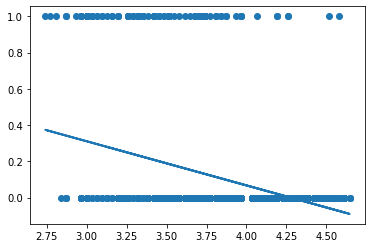

Text(0, 0.5, 'Frequency of poz')

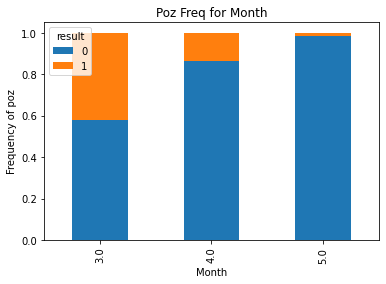

In [5]:
for i in range(len(df_train)): 
   df_train.loc[i,'dres'] = int(df_train.loc[i,'data rezultat testare'].split('-')[0])
   df_train.loc[i,'mres'] = int(df_train.loc[i,'data rezultat testare'].split('-')[1].strip("0"))
   df_train.loc[i,'yres'] = int(df_train.loc[i,'data rezultat testare'].split('-')[2].split(' ')[0])


for i in range(len(df_test)): 
   df_test.loc[i,'dres'] = int(df_test.loc[i,'data rezultat testare'].split('-')[0])
   df_test.loc[i,'mres'] = int(df_test.loc[i,'data rezultat testare'].split('-')[1].strip("0"))
   df_test.loc[i,'yres'] = int(df_test.loc[i,'data rezultat testare'].split('-')[2].split(' ')[0])

df_train['absolutetime']=(df_train.yres - 2020) * 12 + (df_train.mres-1)+df_train.dres/31.0
df_test['absolutetime']=(df_test.yres - 2020) * 12 + (df_test.mres-1)+df_test.dres/31.0

df_train['result'] = np.where(df_train['rezultat testare'].str.contains("POZ"), 1, 0)
df_test['result'] = np.where(df_test['rezultat testare'].str.contains("POZ"), 1, 0)

X_train = df_train[['absolutetime']]
y_train = df_train['result']

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


result_pred = regr.predict(df_test[['absolutetime']])

plt.scatter(df_test.absolutetime, df_test.result)
plt.plot(df_test.absolutetime, result_pred, linewidth=2)
plt.show()

table = pd.crosstab(df_train.mres,df_train.result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poz Freq for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of poz')


Linear regression pe varsta

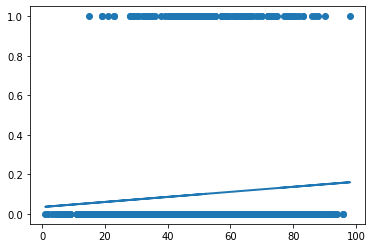

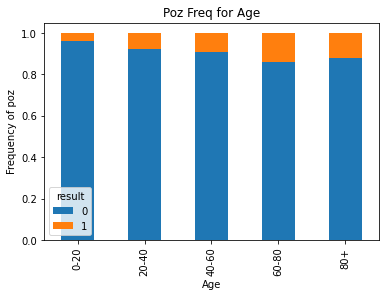

In [6]:
X_train = df_train[['vârstă']]
y_train = df_train['result']

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


result_pred = regr.predict(df_test[['vârstă']])

plt.scatter(df_test.vârstă, df_test.result)
plt.plot(df_test.vârstă, result_pred, linewidth=2)
plt.show()

for i in range(len(df_train)): 
    if ( df_train.loc[i,'vârstă'] < 20):
        df_train.loc[i,'age_group'] = '0-20'
    elif ( df_train.loc[i,'vârstă'] < 40):
        df_train.loc[i,'age_group'] = '20-40'
    elif ( df_train.loc[i,'vârstă'] < 60):
        df_train.loc[i,'age_group'] = '40-60'
    elif ( df_train.loc[i,'vârstă'] < 80):
        df_train.loc[i,'age_group'] = '60-80'
    else:
        df_train.loc[i,'age_group'] = '80+'

table = pd.crosstab(df_train.age_group,df_train.result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poz Freq for Age')
plt.xlabel('Age')
plt.ylabel('Frequency of poz')

plt.show()

Istoric de calatorie viz

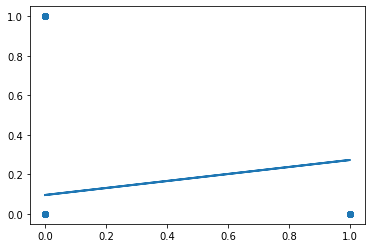

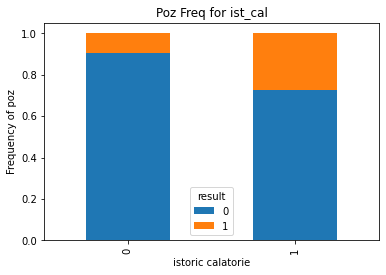

In [7]:
df_train['ist_cal'] = np.where(df_train['istoric de călătorie'].str.contains("DA"), 1, 0)
df_test['ist_cal'] = np.where(df_test['istoric de călătorie'].str.contains("DA"), 1, 0)

X_train = df_train[['ist_cal']]
y_train = df_train['result']

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

result_pred = regr.predict(df_test[['ist_cal']])

plt.scatter(df_test.ist_cal, df_test.result)
plt.plot(df_test.ist_cal, result_pred, linewidth=2)
plt.show()

table = pd.crosstab(df_train.ist_cal,df_train.result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poz Freq for ist_cal')
plt.xlabel('istoric calatorie')
plt.ylabel('Frequency of poz')

plt.show()

Mijloace de transport folosite da/nu viz

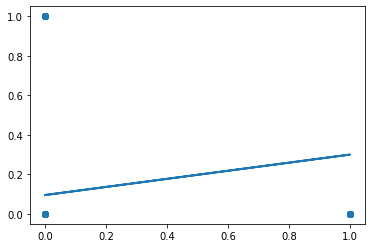

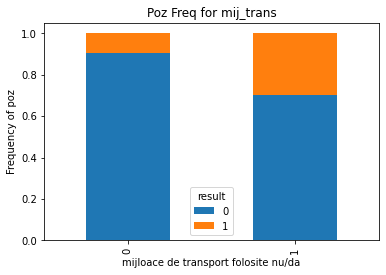

In [8]:
df_train['mij_trans'] = np.where(df_train['mijloace de transport folosite'].str.contains("DA"), 1, 0)
df_test['mij_trans'] = np.where(df_test['mijloace de transport folosite'].str.contains("DA"), 1, 0)

X_train = df_train[['mij_trans']]
y_train = df_train['result']

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

result_pred = regr.predict(df_test[['mij_trans']])

plt.scatter(df_test.mij_trans, df_test.result)
plt.plot(df_test.mij_trans, result_pred, linewidth=2)
plt.show()

table = pd.crosstab(df_train.mij_trans,df_train.result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poz Freq for mij_trans')
plt.xlabel('mijloace de transport folosite nu/da')
plt.ylabel('Frequency of poz')

plt.show()

Confirmare contact cu o pesoana infectata da/nu viz

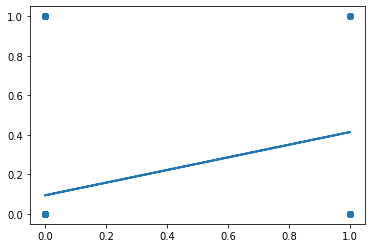

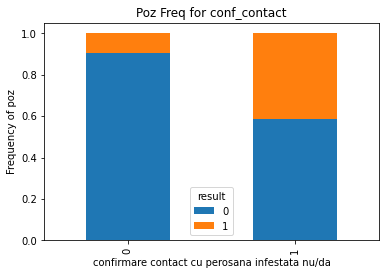

In [9]:
df_train['conf_contact'] = np.where(df_train['confirmare contact cu o persoană infectată'].str.contains("DA"), 1, 0)
df_test['conf_contact'] = np.where(df_test['confirmare contact cu o persoană infectată'].str.contains("DA"), 1, 0)

X_train = df_train[['conf_contact']]
y_train = df_train['result']

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

result_pred = regr.predict(df_test[['conf_contact']])

plt.scatter(df_test.conf_contact, df_test.result)
plt.plot(df_test.conf_contact, result_pred, linewidth=2)
plt.show()

table = pd.crosstab(df_train.conf_contact,df_train.result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poz Freq for conf_contact')
plt.xlabel('confirmare contact cu perosana infestata nu/da')
plt.ylabel('Frequency of poz')

plt.show()

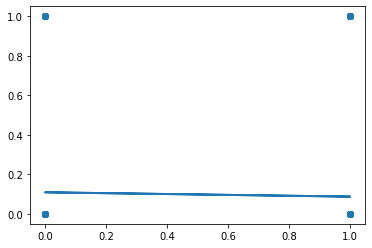

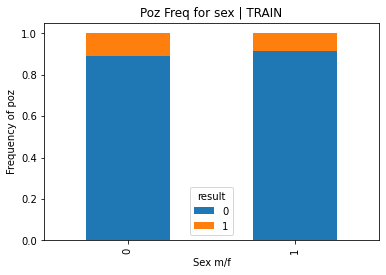

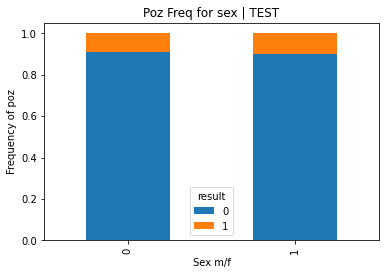

In [10]:
df_train['sex_n'] = np.where(df_train['sex'].str.contains("FEMININ"), 1, 0)
df_test['sex_n'] = np.where(df_test['sex'].str.contains("FEMININ"), 1, 0)

X_train = df_train[['sex_n']]
y_train = df_train['result']

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

result_pred = regr.predict(df_test[['sex_n']])

plt.scatter(df_test.sex_n, df_test.result)
plt.plot(df_test.sex_n, result_pred, linewidth=2)
plt.show()

table = pd.crosstab(df_train.sex_n,df_train.result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poz Freq for sex | TRAIN')
plt.xlabel('Sex m/f')
plt.ylabel('Frequency of poz')

table = pd.crosstab(df_test.sex_n,df_test.result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poz Freq for sex | TEST')
plt.xlabel('Sex m/f')
plt.ylabel('Frequency of poz')
plt.show()

Sexul nu conteaza

Vizualizare Simptome : ( mai jos)

Text(0, 0.5, 'Frequency of poz')

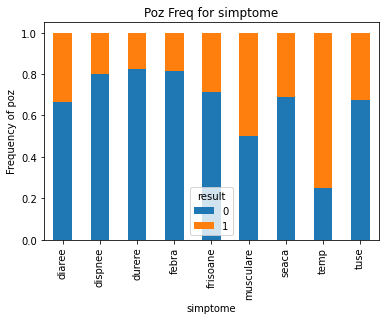

In [11]:
simptome =[ "febra", "tuse", "temp" , "frisoane",
 "seaca", "musculare", "diaree", "dispnee", "disfagee", "durere"]
df_train['result'] = np.where(df_train['rezultat testare'].str.contains("POZ"), 1, 0)
df_test['simpt'] = np.where(df_test['rezultat testare'].str.contains("POZ"), 1, 0)


for i in range(len(df_train['simptome declarate'])):
    x = str(df_train.loc[i,'simptome declarate']).replace(",", " ").split(" ")
    
    for simptom in simptome:
        if simptom in x or simptom.upper() in x:
            df_train.loc[i, 'simptome de interes'] = simptom


table = pd.crosstab(df_train['simptome de interes'],df_train['result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poz Freq for simptome')
plt.xlabel('simptome')
plt.ylabel('Frequency of poz')

Unele simptome conteaza : 
    - temp
    - frisoane
    - tuse seaca
    - dureri musculare
    - febra
    

Viualizare diagnostic :

Text(0, 0.5, 'Frequency of poz')

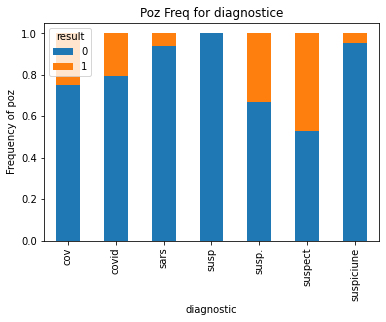

In [12]:
suspiciuni =["sars", "cov","suspiciune", "covid", "susp","susp.","suspect"]

df_train['result'] = np.where(df_train['rezultat testare'].str.contains("POZ"), 1, 0)

for i in range(len(df_train['diagnostic și semne de internare'])):
    x = str(df_train.loc[i,'diagnostic și semne de internare']).replace(",", " ").split(" ")
    
    for suspiciune in suspiciuni:
        if suspiciune in x or suspiciune.upper() in x:
            df_train.loc[i, 'diagnostic'] = suspiciune


table = pd.crosstab(df_train['diagnostic'],df_train['result'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poz Freq for diagnostice')
plt.xlabel('diagnostic')
plt.ylabel('Frequency of poz')

Doar in cazul in care zice "suspect" sau "susp." sunt sanse mari